In [2]:
import tskit
import numpy as np
import matplotlib.pyplot as plt
import tszip
import sys
import importlib
import ld_calculator

importlib.reload(ld_calculator)

<module 'ld_calculator' from '/nfs_home/users/osvk/projects/tskit-ld/ld_calculator.py'>

In [3]:
# Load the tree sequence from the data folder
ts = tszip.decompress("data/simulated_chrom_22.ts.tsz")
ts

In [4]:
ld_calc = ld_calculator.LdInfo(ts, 22)

In [6]:
num_sites = 500
max_dist = 200_000
sites_a = np.sort(np.random.choice(ld_calc.get_single_mutation_sites(), size=num_sites))
sites_b = ld_calc.return_random_sites_in_range(sites_a, max_dist=max_dist)
r2, compute_times = ld_calc.compute_ld_with_time(sites_a, sites_b)
distances = ld_calc.compute_distance_between_sites(sites_a, sites_b)
distances = np.array(distances) / 1_000

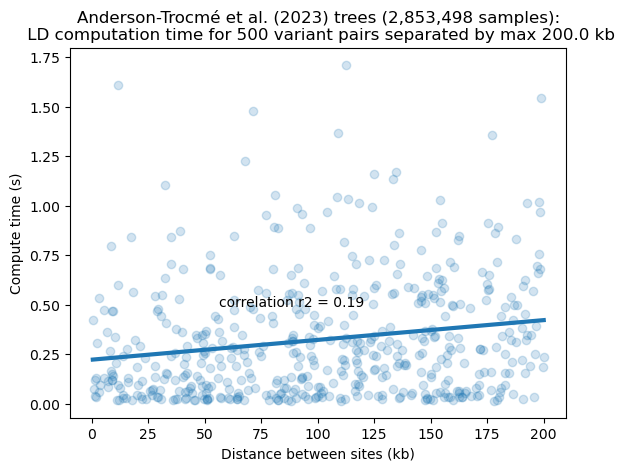

In [8]:
plt.scatter(distances, compute_times, alpha=0.2)
corr = f"correlation r2 = {np.corrcoef(distances, compute_times)[0,1]:.2f}"

plt.plot(
    np.unique(distances),
    np.poly1d(np.polyfit(distances, compute_times, 1))(np.unique(distances)),
    label=f"{corr}",
    linewidth=3,
)
plt.xlabel("Distance between sites (kb)")
plt.ylabel("Compute time (s)")
plt.title(
    f"Anderson-Trocmé et al. (2023) trees ({ts.num_samples:,} samples):\n LD computation time for {num_sites:,} variant pairs separated by max {max_dist/1_000:,} kb"
)
plt.text(0.3, 0.3, corr, transform=plt.gca().transAxes)
plt.show()